<a href="https://colab.research.google.com/github/lonespear/MA206/blob/main/dillon_taylor_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
install.packages('NHANES')
install.packages('stargazer')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(NHANES)
library(tidyverse)
data(NHANES)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [53]:
library(stargazer)


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




In [20]:
NHANES %>% count(MaritalStatus)

MaritalStatus,n
<fct>,<int>
Divorced,707
LivePartner,560
Married,3945
NeverMarried,1380
Separated,183
Widowed,456
NA,2769


In [19]:
NHANES %>% count(Education)

Education,n
<fct>,<int>
8th Grade,451
9 - 11th Grade,888
High School,1517
Some College,2267
College Grad,2098
NA,2779


In [48]:
df <- NHANES %>%
  select(Age, MaritalStatus, Education, DaysMentHlthBad, SleepHrsNight, Work, BMI, TotChol, AlcoholDay, HardDrugs) %>%
  filter(Age > 25, MaritalStatus == "Married", Education == "College Grad", !is.na(AlcoholDay)) %>%
  drop_na() %>%
  filter(Work != "Looking")

In [6]:
df %>% head

Age,MaritalStatus,Education,DaysMentHlthBad,SleepHrsNight,Work,BMI
<int>,<fct>,<fct>,<int>,<int>,<fct>,<dbl>
45,Married,College Grad,3,8,Working,27.24
45,Married,College Grad,3,8,Working,27.24
45,Married,College Grad,3,8,Working,27.24
56,Married,College Grad,0,7,NotWorking,19.73
56,Married,College Grad,0,7,NotWorking,19.73
26,Married,College Grad,2,7,Working,21.00


In [43]:
NHANES %>% filter(!is.na(AlcoholDay)) %>% select(AlcoholDay)

AlcoholDay
<int>
2
3
3
3
1
2
6
3
6


In [8]:
NHANES %>% colnames

[1] "ID"               "SurveyYr"         "Gender"           "Age"             
 [5] "AgeDecade"        "AgeMonths"        "Race1"            "Race3"           
 [9] "Education"        "MaritalStatus"    "HHIncome"         "HHIncomeMid"     
[13] "Poverty"          "HomeRooms"        "HomeOwn"          "Work"            
[17] "Weight"           "Length"           "HeadCirc"         "Height"          
[21] "BMI"              "BMICatUnder20yrs" "BMI_WHO"          "Pulse"           
[25] "BPSysAve"         "BPDiaAve"         "BPSys1"           "BPDia1"          
[29] "BPSys2"           "BPDia2"           "BPSys3"           "BPDia3"          
[33] "Testosterone"     "DirectChol"       "TotChol"          "UrineVol1"       
[37] "UrineFlow1"       "UrineVol2"        "UrineFlow2"       "Diabetes"        
[41] "DiabetesAge"      "HealthGen"        "DaysPhysHlthBad"  "DaysMentHlthBad" 
[45] "LittleInterest"   "Depressed"        "nPregnancies"     "nBabies"         
[49] "Age1stBaby"       "SleepHrsNight"    "SleepTrouble"     "PhysActive"      
[53] "PhysActiveDays"   "TVHrsDay"         "CompHrsDay"       "TVHrsDayChild"   
[57] "CompHrsDayChild"  "Alcohol12PlusYr"  "AlcoholDay"       "AlcoholYear"     
[61] "SmokeNow"         "Smoke100"         "Smoke100n"        "SmokeAge"        
[65] "Marijuana"        "AgeFirstMarij"    "RegularMarij"     "AgeRegMarij"     
[69] "HardDrugs"        "SexEver"          "SexAge"           "SexNumPartnLife" 
[73] "SexNumPartYear"   "SameSex"          "SexOrientation"   "PregnantNow"

In [50]:
exp_mdl <- NHANES %>% select(-ID) %>% lm(DaysMentHlthBad ~ .)

ERROR: Error in as.data.frame.default(data): cannot coerce class ‘"formula"’ to a data.frame


In [46]:
NHANES %>% count(HardDrugs)

HardDrugs,n
<fct>,<int>
No,4700
Yes,1065
NA,4235


In [22]:
summary(NHANES$TotChol)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.530   4.110   4.780   4.879   5.530  13.650    1526 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


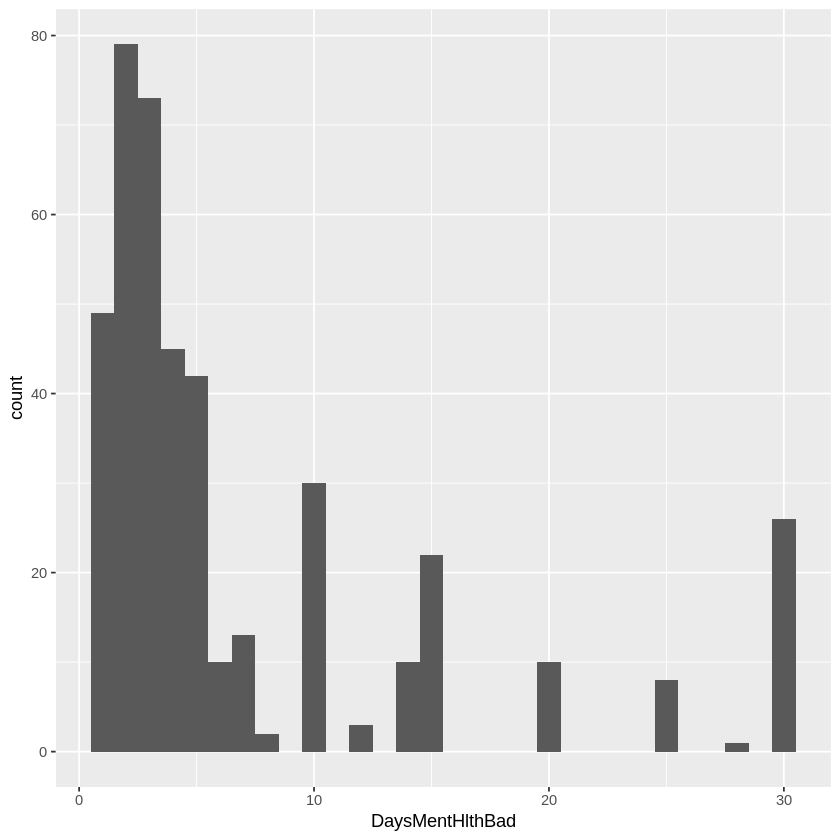

In [10]:
df %>% filter(DaysMentHlthBad > 0) %>% ggplot(aes(x=DaysMentHlthBad)) + geom_histogram()

In [14]:
df %>% colnames

[1] "Age"             "MaritalStatus"   "Education"       "DaysMentHlthBad"
[5] "SleepHrsNight"   "Work"            "BMI"

In [13]:
df_filtered <- df %>% filter(DaysMentHlthBad > 0)
summary(df_filtered$DaysMentHlthBad)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   7.085  10.000  30.000 

In [32]:
modl1 <- lm(DaysMentHlthBad ~ SleepHrsNight + BMI + Work, data = df)
summary(modl1)


Call:
lm(formula = DaysMentHlthBad ~ SleepHrsNight + BMI + Work, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9431 -2.7582 -2.0242 -0.0995 28.5355 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    7.24252    1.49062   4.859 1.34e-06 ***
SleepHrsNight -0.65313    0.15384  -4.246 2.35e-05 ***
BMI           -0.01924    0.03078  -0.625    0.532    
WorkWorking    0.60148    0.39794   1.511    0.131    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.753 on 1182 degrees of freedom
Multiple R-squared:  0.01879,	Adjusted R-squared:  0.0163 
F-statistic: 7.546 on 3 and 1182 DF,  p-value: 5.296e-05


In [34]:
modl2 <- lm(DaysMentHlthBad ~ SleepHrsNight*Work + BMI, data = df)
summary(modl2)


Call:
lm(formula = DaysMentHlthBad ~ SleepHrsNight * Work + BMI, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1848 -2.7557 -2.1470 -0.1857 28.2383 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                9.35563    2.16414   4.323 1.67e-05 ***
SleepHrsNight             -0.93756    0.26129  -3.588 0.000347 ***
WorkWorking               -2.55332    2.37662  -1.074 0.282885    
BMI                       -0.01981    0.03077  -0.644 0.519907    
SleepHrsNight:WorkWorking  0.43483    0.32295   1.346 0.178423    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.751 on 1181 degrees of freedom
Multiple R-squared:  0.0203,	Adjusted R-squared:  0.01698 
F-statistic: 6.117 on 4 and 1181 DF,  p-value: 7.155e-05


In [37]:
modl3 <- lm(DaysMentHlthBad ~ SleepHrsNight + Work + BMI, data = df_filtered)
summary(modl3)


Call:
lm(formula = DaysMentHlthBad ~ SleepHrsNight + Work + BMI, data = df_filtered)

Residuals:
   Min     1Q Median     3Q    Max 
-8.562 -5.075 -3.160  1.945 24.995 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   13.42670    3.35106   4.007 7.29e-05 ***
SleepHrsNight -1.12892    0.34942  -3.231  0.00133 ** 
WorkWorking    1.16641    0.95128   1.226  0.22083    
BMI            0.02197    0.06962   0.316  0.75245    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.797 on 419 degrees of freedom
Multiple R-squared:  0.02805,	Adjusted R-squared:  0.02109 
F-statistic: 4.031 on 3 and 419 DF,  p-value: 0.007607


In [38]:
modl4 <- lm(DaysMentHlthBad ~ SleepHrsNight*Work + BMI, data = df_filtered)
summary(modl4)


Call:
lm(formula = DaysMentHlthBad ~ SleepHrsNight * Work + BMI, data = df_filtered)

Residuals:
   Min     1Q Median     3Q    Max 
-8.569 -5.072 -3.157  1.937 25.002 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)   
(Intercept)               13.37768    4.80754   2.783  0.00564 **
SleepHrsNight             -1.12192    0.60346  -1.859  0.06371 . 
WorkWorking                1.23901    5.18791   0.239  0.81136   
BMI                        0.02200    0.06973   0.316  0.75252   
SleepHrsNight:WorkWorking -0.01049    0.73683  -0.014  0.98865   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.807 on 418 degrees of freedom
Multiple R-squared:  0.02805,	Adjusted R-squared:  0.01875 
F-statistic: 3.016 on 4 and 418 DF,  p-value: 0.01795


In [49]:
modl5 <- lm(DaysMentHlthBad ~ SleepHrsNight + Work + BMI + TotChol + AlcoholDay + HardDrugs, data = df)
summary(modl5)


Call:
lm(formula = DaysMentHlthBad ~ SleepHrsNight + Work + BMI + TotChol + 
    AlcoholDay + HardDrugs, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-5.277 -2.754 -1.886 -0.009 29.027 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    7.370668   2.203708   3.345 0.000858 ***
SleepHrsNight -0.825316   0.189979  -4.344 1.56e-05 ***
WorkWorking   -0.019819   0.532447  -0.037 0.970316    
BMI            0.009955   0.039249   0.254 0.799845    
TotChol        0.178280   0.183395   0.972 0.331261    
AlcoholDay    -0.035173   0.171045  -0.206 0.837122    
HardDrugsYes   0.796844   0.669775   1.190 0.234472    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.931 on 896 degrees of freedom
Multiple R-squared:  0.02491,	Adjusted R-squared:  0.01838 
F-statistic: 3.815 on 6 and 896 DF,  p-value: 0.000921


In [28]:
df_log <- df %>% filter(DaysMentHlthBad > 0) %>% mutate(DaysMentHlthBad = log(DaysMentHlthBad))
model1 <- lm(DaysMentHlthBad ~ SleepHrsNight + Work + BMI, data = df_log)
summary(model1)


Call:
lm(formula = DaysMentHlthBad ~ SleepHrsNight + Work + BMI, data = df_log)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7558 -0.6558 -0.1139  0.7081  2.1920 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.945941   0.407529   4.775 2.49e-06 ***
SleepHrsNight -0.130391   0.042494  -3.068  0.00229 ** 
WorkWorking    0.091807   0.115687   0.794  0.42789    
BMI            0.013243   0.008466   1.564  0.11851    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9482 on 419 degrees of freedom
Multiple R-squared:  0.03136,	Adjusted R-squared:  0.02442 
F-statistic: 4.521 on 3 and 419 DF,  p-value: 0.00391


In [26]:
model2 <- lm(DaysMentHlthBad ~ SleepHrsNight + Work*BMI, data = df)
summary(model2)

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): NA/NaN/Inf in 'y'


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


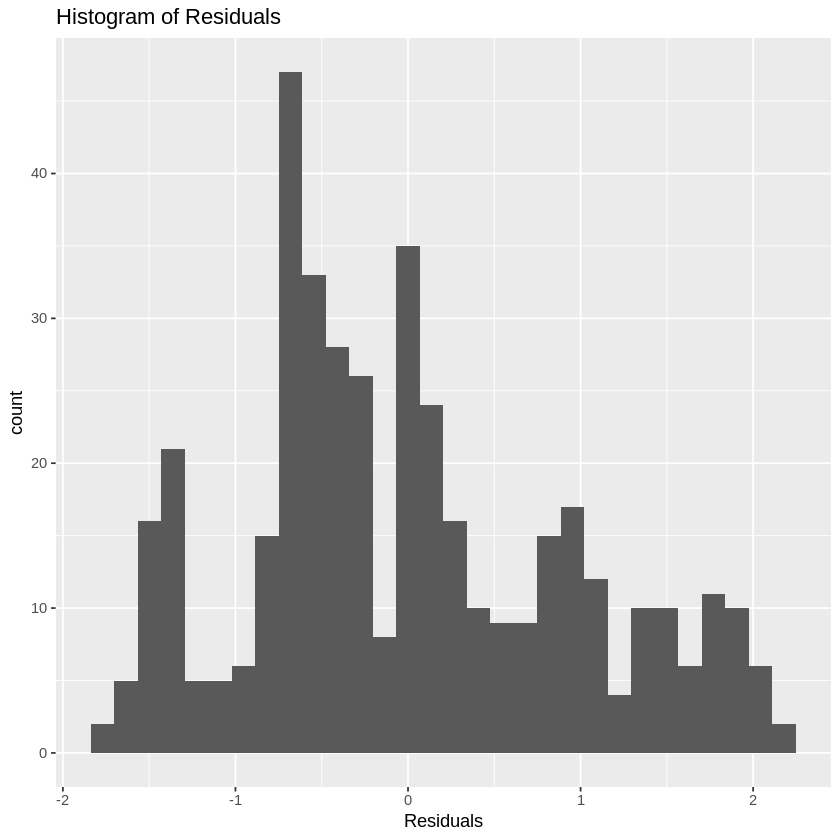

In [29]:
model1 %>%
  fortify(model1$model) %>%
  ggplot(aes(x = .resid)) +
  geom_histogram() +
  labs(x = "Residuals",
       title = "Histogram of Residuals")

In [57]:
stargazer(modl1, modl2, modl3, modl4, modl5,
          type = "text",           # use "html" or "latex" if needed
          title = "Regression Results",
          column.labels = c("Model 1", "Model 2", "Model 3", "Model 4", "Model 5"),
          dep.var.labels = "Days of Bad Mental Health",
          covariate.labels = c("Sleep Hours/Night", "Working", "BMI"),
          omit.stat = c("f", "ser"),  # optional: omit F-statistic and standard error
          no.space = TRUE)


Regression Results
                                 Dependent variable:               
                  -------------------------------------------------
                              Days of Bad Mental Health            
                   Model 1   Model 2   Model 3   Model 4   Model 5 
                     (1)       (2)       (3)       (4)       (5)   
-------------------------------------------------------------------
Sleep Hours/Night -0.653*** -0.938*** -1.129***  -1.122*  -0.825***
                   (0.154)   (0.261)   (0.349)   (0.603)   (0.190) 
Working            -0.019    -0.020     0.022     0.022     0.010  
                   (0.031)   (0.031)   (0.070)   (0.070)   (0.039) 
BMI                           0.435              -0.010            
                             (0.323)             (0.737)           
TotChol                                                     0.178  
                                                           (0.183) 
AlcoholDay                  